<a href="https://colab.research.google.com/github/Anjasfedo/pytorch/blob/neural_network_classification/02_pytorch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with PyTorch

classification problem is predictiong wheater something is a thing or another

- Regression: prediction number
- Classification: prediction a thing
  - Binary Classification: one thing or other
  - Multiclass Classification: more than one thing or another
  - Multilabel Classification: multiple label option per sample

  classification oftenly have numerical input, and some probability output

  * Typical architecture of Neural Network
   - input layer shape (in_features): number of features
   - hidden layer
   - neuron per hidden layer: generly 10 to 512
   - output layer shape (out_features)
   - hidden layer activation: usually ReLu
   - output activation: Sigmoid (binary), Softmax (multiclass)
   - loss function: Binary crossentropy (binary), Cross entropy (multiclass)
   - Optimizer: SGD, Adam

## 1. Make classification data

In [22]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [23]:
print(f"First 5 sample of X: {X[:5]}")
print(f"First 5 sample of y: {y[:5]}")

First 5 sample of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y: [1 1 1 1 0]


In [24]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


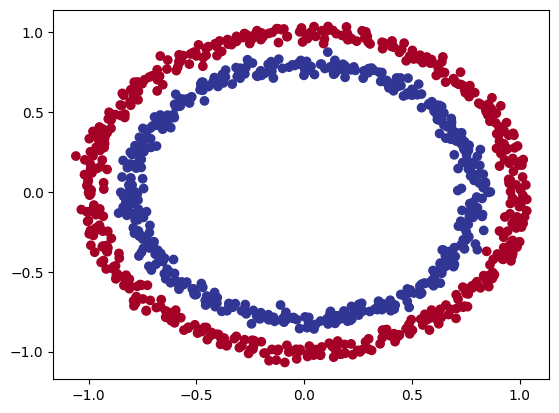

In [25]:
# Visualize, visaulize, visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: data we working with often reffered to as a toy dataset, a dataset that small enough to experiment, but still sizeable enough for practice the fundamentals

### 1.1 Check input & output shapes

In [26]:
X.shape, y.shape

((1000, 2), (1000,))

In [27]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [28]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [29]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train & test split

In [30]:
import torch
torch.__version__

'2.3.0+cu121'

In [31]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [32]:
# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [33]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [34]:
# Split data into training & testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test, rest of 80% be train
                                                    random_state=42)

In [37]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

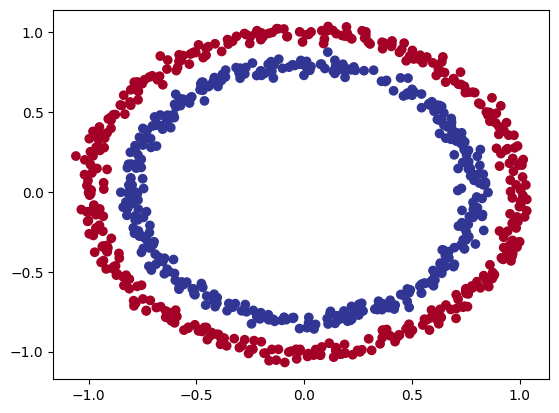

In [55]:
plt.scatter(x=X_train[:, 0],
            y=X_train[:, 1],
            c=y_train,
            cmap=plt.cm.RdYlBu)

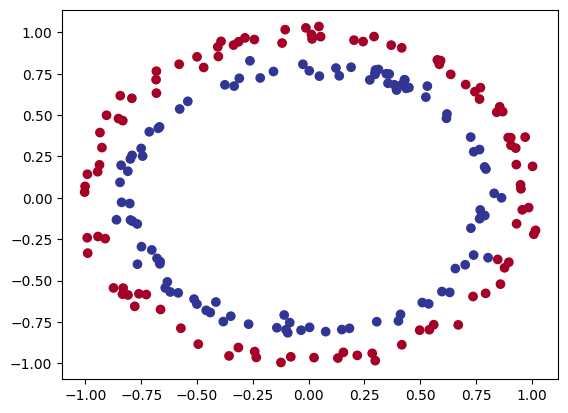

In [57]:
plt.scatter(x=X_test[:, 0],
            y=X_test[:, 1],
            c=y_test,
            cmap=plt.cm.RdYlBu)

## 2. Building a model

build a model to classify blue or red dots
to do:
1. setup device agnostic code for accelerator on GPU
2. construct a model (by subclassing `nn.Module`)
3. define loss function & optimizer
4. create training & testing loop

In [58]:
# Import PyTorch & nn
import torch
from torch import nn

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [59]:
# Move data sets to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

Now device agnostic have created, now lets create a mode that:
1. subclasses `nn.Module`
2. create 2 `nn.Linear()` layer that capable handling the shapes of data
3. define a `forward()` moethod that outlines the forward pass or forward computation
4. inisiate a instance of model class and send it to target device

In [63]:
X_train.shape

torch.Size([800, 2])

In [64]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [65]:
# 1. Construct a model that subclassed `nn.Module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 `nn.Linear()` layers that capable handling the shapes of input data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features, and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from prev layer and output 1 (y)

  # 3. Define a `forward()` method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# Instantiate an instance of model class, and send to device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [68]:
next(model_0.parameters()).device

device(type='cpu')

In [73]:
# Replicate the model with `nn.Sequential()`
model_01 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_01

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [74]:
class CircleModelV02(nn.Module):
  def __init__(self):
    super().__init__()

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
        )

  def forward(self, x):
    return self.two_linear_layers(x)

model_02 = CircleModelV02().to(device)
model_02

CircleModelV02(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [76]:
model_0.state_dict(), model_01.state_dict()

(OrderedDict([('layer_1.weight',
               tensor([[-0.4972, -0.2441],
                       [ 0.4641, -0.6887],
                       [ 0.6906, -0.5439],
                       [-0.1161,  0.1575],
                       [ 0.6298,  0.2833]])),
              ('layer_1.bias',
               tensor([-0.3756,  0.3064,  0.3749,  0.5436, -0.0628])),
              ('layer_2.weight',
               tensor([[ 0.3300,  0.0221, -0.3288, -0.3292,  0.0318]])),
              ('layer_2.bias', tensor([-0.3879]))]),
 OrderedDict([('0.weight',
               tensor([[ 0.1723, -0.6944],
                       [-0.4486,  0.3947],
                       [ 0.2999, -0.3663],
                       [-0.6825, -0.4995],
                       [ 0.5510,  0.3877]])),
              ('0.bias',
               tensor([-0.6802, -0.4619,  0.4929,  0.3404,  0.6678])),
              ('1.weight',
               tensor([[ 0.3624,  0.2922, -0.0720, -0.3968, -0.1765]])),
              ('1.bias', tensor([-0.4329]))]))

In [80]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_01(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
